# GA Toolbox for DEAP with multiple runs.

All Evolutionary Algorithms are stochastic, so we will almost always want to run them mutiple times to:
* Give the algorithm a best chance to discover an optimal solution;
* Extract meaningful statistics.

Install DEAP. 

In [ ]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib). 

In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters. Notice that this time we have the all important **N_RUNS** to indicate how many runs we want. Thirty runs is a good number to give us faith in the statistics, but always start with a small number of runs to establish that everything is working the way you think it is.

In [2]:
# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10

N_RUNS = 30


Set any problem-specific constants here. In this case we need to know how long the string is.

In [3]:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

Set the random seed. 

In [4]:
RANDOM_SEED = 412
random.seed(RANDOM_SEED)

Create our toolbox. Note that this is the same is in our original example.

In [5]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selRoulette)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)



Create a **list** for each statistic we're going to keep track of (one for each run, once we're finished all runs we'll extract them). This time we're going to up the ante in terms of what we're recording:

* Max fitness;
* Average fitness;
* Min fitness;
* Standard deviation of fitness.

Standard deviation is **hugely** important in EAs as it tells us what the variation is like. 

In [6]:
maxList = []
avgList = []
minList = []
stdList = []

Loop through each run. The code inside the loop is pretty much the same that we had in the single run, but this time we have it all in the same cell because we can to loop over. Notice that each run has its **own** hall of fame, so comment out that output if you want to keep things looking tidy.

In [7]:
for r in range(0, N_RUNS):
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # Which run are we on?
    print("\n\nCurrently on run", r, "of",N_RUNS)
    
    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                               ngen=MAX_GENERATIONS,
                                              stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info: (comment out to reduce the output as it generates a LOT)
    #print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    #print("Best Ever Individual = ", hof.items[0])


    
    # Genetic Algorithm is done with this run - extract statistics:
    meanFitnessValues, stdFitnessValues, minFitnessValues, maxFitnessValues  = logbook.select("avg", "std", "min", "max")

    # Save statistics for this run:
    avgList.append(meanFitnessValues)
    stdList.append(stdFitnessValues)
    minList.append(minFitnessValues)
    maxList.append(maxFitnessValues)





Currently on run 0 of 30
gen	nevals	avg  	std    	min	max
0  	100   	49.94	5.86825	36 	61 
1  	74    	51.53	4.98087	39 	60 
2  	70    	51.62	4.62338	40 	61 
3  	62    	52.28	4.04989	42 	60 
4  	66    	53.05	4.37579	42 	64 
5  	76    	53   	4.67547	42 	63 
6  	84    	53.34	4.3594 	40 	63 
7  	70    	54.21	4.19117	44 	64 
8  	64    	55.18	4.59648	44 	65 
9  	76    	55.27	4.07886	44 	65 
10 	68    	55.87	3.3872 	48 	64 
11 	79    	55.83	4.07935	47 	67 
12 	76    	56.39	3.96458	48 	68 
13 	64    	55.87	3.21762	47 	63 
14 	72    	56.23	3.67928	49 	65 
15 	71    	56.57	3.36825	49 	65 
16 	68    	57.35	3.20429	51 	65 
17 	74    	57.43	3.40956	50 	66 
18 	66    	57.23	3.38188	50 	65 
19 	76    	57.17	3.30168	50 	64 
20 	73    	57.71	3.11543	50 	64 
21 	73    	57.34	3.13758	50 	65 
22 	68    	57.43	3.17255	51 	64 
23 	68    	58.03	3.23251	49 	66 
24 	90    	58.04	3.29217	49 	67 
25 	68    	58.33	3.28346	52 	66 
26 	67    	58.35	2.95085	51 	67 
27 	72    	58.59	2.8986 	52 	66 
28 	66    	59.18

Create our graphs using the averages across all the runs. Notice how we use standard deviation to show how much variation there is in the runs.

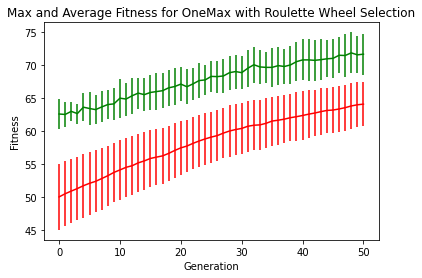

In [8]:
# Genetic Algorithm is done (all runs) - plot statistics:
x = numpy.arange(0, MAX_GENERATIONS+1)
avgArray = numpy.array(avgList)
stdArray = numpy.array(stdList)
minArray = numpy.array(minList)
maxArray = numpy.array(maxList)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Max and Average Fitness for OneMax with Roulette Wheel Selection')
plt.errorbar(x, avgArray.mean(0), yerr=stdArray.mean(0),label="Average",color="Red")
plt.errorbar(x, maxArray.mean(0), yerr=maxArray.std(0),label="Best", color="Green")
plt.show()
    